In [67]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [68]:
model = YOLO("yolov8m.pt")

In [69]:
image_path = "car-samples/twowheelers.jpeg"
results = model.predict(image_path)


image 1/1 /home/aarya/Desktop/Real-Time-Street-Parking/Untrained_YOLOv8m_forAuto/car-samples/twowheelers.jpeg: 352x640 2 cars, 3 motorcycles, 1 truck, 126.8ms
Speed: 2.9ms preprocess, 126.8ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


In [70]:
result = results[0]
box = result.boxes[0]

In [71]:
# print(len(result.boxes))
# box = result.boxes[0]
# print("Object Type: ", box.cls)
# print("Coordinates: ", box.xyxy)
# print("Probability: ", box.conf)

In [72]:
# #UPON CONVERSION TO LIST THE CUDA TAIL-TAG IS IGNORED (THANK SHRI KRISHNA FOR SIMPLICITY)
# cords = box.xyxy[0].tolist()
# cords = [round(x) for x in cords]
# class_id = result.names[box.cls[0].item()]
# conf = round(box.conf[0].item(), 2)
# print("Object Type: ", class_id)
# print("Coordinates: ", cords)
# print("Probablity: ", conf)
# #print(result.names)

In [73]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: car
Coordinates: [115, 8, 133, 19]
Probability: 0.72
---
Object type: motorcycle
Coordinates: [206, 119, 237, 165]
Probability: 0.32
---
Object type: motorcycle
Coordinates: [164, 105, 191, 134]
Probability: 0.27
---
Object type: motorcycle
Coordinates: [230, 119, 259, 158]
Probability: 0.26
---
Object type: truck
Coordinates: [142, 1, 160, 23]
Probability: 0.25
---
Object type: car
Coordinates: [0, 141, 75, 164]
Probability: 0.25
---


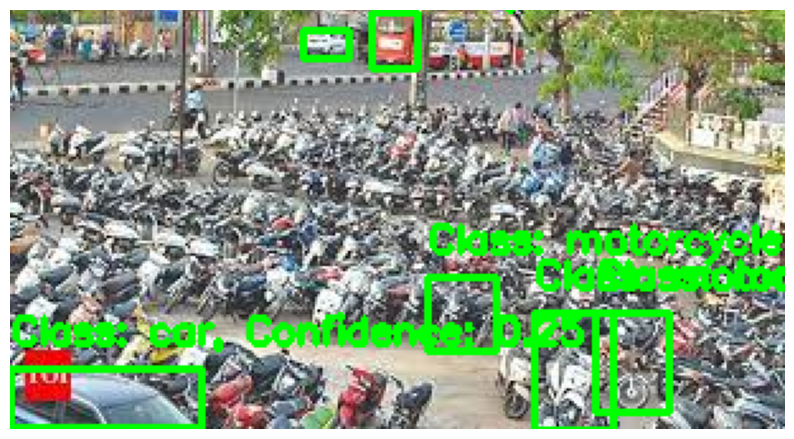

In [74]:
image = cv2.imread(image_path)
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    confidence = round(box.conf[0].item(), 2)
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    x_min, y_min, x_max, y_max = cords
    color = (0, 255, 0)  # Green color for bounding boxes (BGR format)
    thickness = 2       # Thickness of the bounding box lines
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    label = f'Class: {class_id}, Confidence: {confidence:.2f}'
    cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()